# Macht

## Fehler 1. Art und 2. Art

Hypothesentests geben keine absolute Sicherheit zur Überprüfung einer Aussage, sondern nur mit einer bestimmten Wahrscheinlichkeit, meist zu 95%, wenn das Signifikanzniveau $\alpha=0.05$ ist.

Was man _will_ , ist folgendes:

- Die Nullhypothese stimmt in Wahrheit und sie wird durch die Daten nicht verworfen.
- Die Nullhypothese stimmt in Wahrheit nicht und sie wird durch die Daten verworfen.

Allerdings sind auch folgende Fälle möglich:
- Die Nullhypothese stimmt in Wahrheit, aber sie wird durch die Daten (fälschlicherweise) verworfen. Dies nennt man Fehler 1. Art.
- Die Nullhypothese stimmt in Wahrheit nicht, aber sie wird durch die Daten (fälschlicherweise) nicht verworfen. Dies nennt man Fehler 2. Art.

Wir wollen diese Fehler genauer graphisch untersuchen und gehen dabei von der Normalverteilungskurve $X\sim\mathcal{N}(5,2^2)$ aus, das heisst $\mu_0=5$ und machen einen einseitigen Test nach oben. 

### Fehler 1. Art
Der Fehler 1. Art wird dann gemacht, wenn die Nullhypothese durch die Daten verworfen wird, obwohl die Nullhypothese stimmt. Das heisst, $\overline{x}_n$ liegt im Verwerfungsbereich. Dies wiederum entspricht gerade dem Signifikanzniveau $\alpha=0.05$. Der Fehler 1. Art entspricht gerade dem Signifikanzniveau. Mit dieser Wahrscheinlichkeit verwerfen wir die Nullhypothese, obwohl sie stimmt. Die Wahrscheinlichkeit können wir auch einzeichnen und entspricht der roten Fläche.

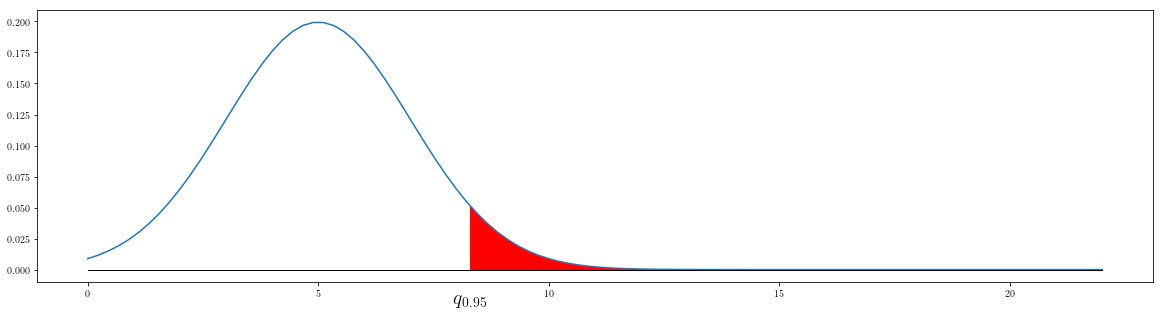

In [5]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
plt.rc('text', usetex=True)
plt.rcParams["figure.figsize"] = (20,5)

# Bereich der x-Achse
aw = 0
ew = 22

# Berechnung der Funktionswerte
mean = 5
sd = 2

x = np.linspace(start=aw, stop=ew, num=100)
y = norm.pdf(x, loc=mean, scale=sd)

plt.plot(x, y)



#Bestimmung der Quantile
q_95 = norm.ppf(q=0.95, loc=mean , scale=sd)

x_v = np.linspace(q_95, ew, 500)

# Fehler 1. Art

plt.text(q_95, -.03, r"$q_{0.95}$", fontsize=20, ha="center")
plt.fill_between(x_v, norm.pdf(x_v, loc=5, scale=2), color="red")
plt.plot([aw, ew], [0,0], color="black", linewidth=1)

### Fehler 2. Art
Beim Fehler 2. Art wird die Nullhypothese _nicht_ verworfen, obwohl die Nullhypothese nicht richtig ist. Oder anders gesagt: Die Alternativhypothese ist richtig, die Nullhypothese wird durch die Daten nicht veworfen. 

Auch diesen Fehler können wir in die Graphik einzeichnen, dazu brauchen wir aber das $\mu_A$ der Alternativhypothese, da diese ja richtig ist. Nehmen wir $\mu_A=10$: 

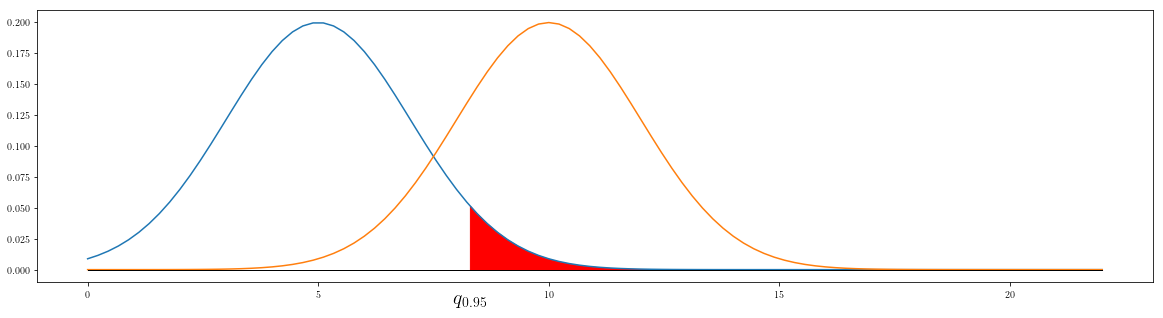

In [6]:
y_A = norm.pdf(x, loc=10, scale=2)

plt.plot(x, y)
plt.plot(x, y_A)

plt.fill_between(x_v, norm.pdf(x_v, loc=5, scale=2), color="red")
plt.text(q_95, -.03, r"$q_{0.95}$", fontsize=20, ha="center")
plt.plot([aw, ew], [0,0], color="black", linewidth=1)

Nun wird die Nullhypothese _nicht_ verworfen, dann liegt $\overline{x}_n$ links des roten Bereiches. Nun betrachten wir die Wahrscheinlichkeit, dass die Alternativhypothese _richtig_ ist, aber trotzdem nicht angenommen wird. Das heisst, wir gehen von der Alternativhypothese aus und betrachten den Bereich der Alternativhypothese, die nicht im Verwerfungsbereich der Nullhypothese liegt. Dies entspricht dann der Wahrscheinlichkeit des Fehlers 2. Art, die unten eingezeichnet violett (eigenlich "plum") eingezeichnet ist.  

Text(8.289707253902945, -0.03, '$q_{0.95}$')

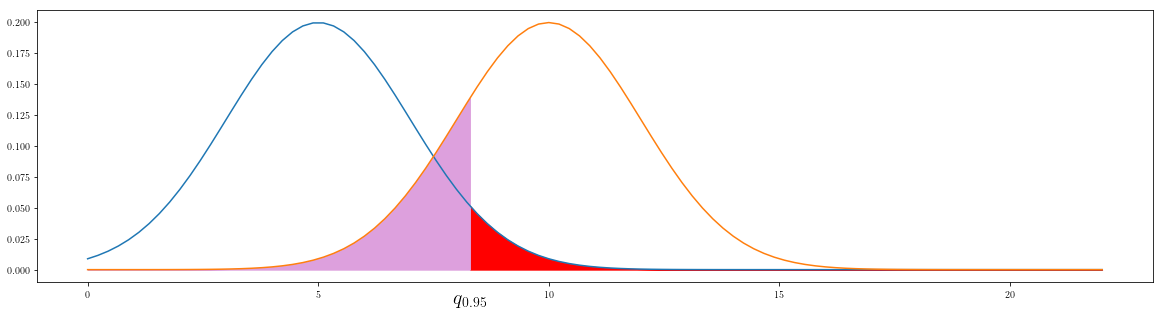

In [43]:
plt.plot(x, y)
plt.plot(x, y_A)

x_2 = np.linspace(aw, q_95, 500)
x_v = np.linspace(q_95, ew, 500)

plt.fill_between(x_v, norm.pdf(x_v, loc=5, scale=2), color="red")
plt.fill_between(x_2, norm.pdf(x_2, loc=10, scale=2), color="plum")

plt.text(q_95, -.03, r"$q_{0.95}$", fontsize=20, ha="center")
plt.plot([aw, ew], [0,0], color="black", linewidth=1)

In Abbildung oben haben wir die beiden Fehler eingezeichnet: 
- Rot: Fehler 1. Art
- Plum: Fehler 2. Art
Man beachte: Die Grenzlinie wird immer durch $q_{0.95}$ von $H_0$  bestimmt:
- Beim Fehler 1. Art betrachten wir die Fläche unter der Kurve der Nullhypothese rechts der Grenze.
- Beim Fehler 2. Art betrachten wir die Fläche unter der Kurve der Alternativhypothese links der Grenze.

## Macht

Nun sind wir aber an der Wahrscheinlichkeit interessiert, dass die Alternativhypothese richtigerweise angenommen wurde. Diese Wahrscheinlichkeit nennen wir _Macht_. Auch diese können wir in die Graphik einzeichnen. 

Das heisst, $\overline{x}_n$ liegt nun im Verwerfungsbereich der Nullhypothese und wir gehen aber von der Alternativhypothese aus. Wir betrachten also den Bereich unter Kurve der Alternativhypothese rechts der Grenze $q_{0.95}$. Dies ist dann die Macht (unten grün eingezeichnet).

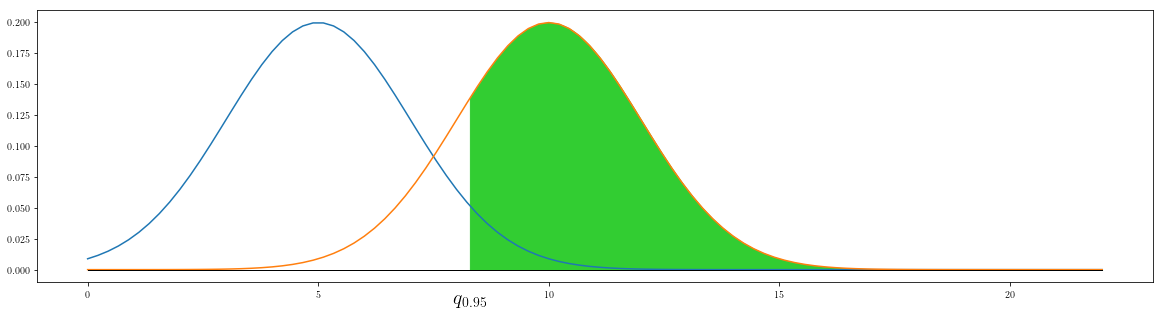

In [7]:
plt.plot(x, y)
plt.plot(x, y_A)

plt.fill_between(x_v, norm.pdf(x_v, loc=10, scale=2), color="limegreen")
plt.text(q_95, -.03, r"$q_{0.95}$", fontsize=20, ha="center")
plt.plot([aw, ew], [0,0], color="black", linewidth=1)

Offensichtlich gilt:
$$
\text{Macht}
=1-\text{Fehler 2. Art}
$$

Wir definieren noch eine Funktion power(), die die Macht für verschiedene $\mu_A$ einzeichnet:

In [8]:
def power(mean_A):
    plt.plot(x,y)
    y_A = norm.pdf(x, loc=mean_A, scale=2)
    plt.plot(x, y_A)
    plt.fill_between(x_v, norm.pdf(x_v, loc=mean_A, scale=2), color="limegreen")
    plt.text(q_95, -.03, r"$q_{0.95}$", fontsize=20, ha="center")   
    plt.plot([aw, ew], [0,0], color="black", linewidth=1)

Wir wählen nun $\mu_A=7$, dann $\mu_A=10$ und $\mu_A=12$.

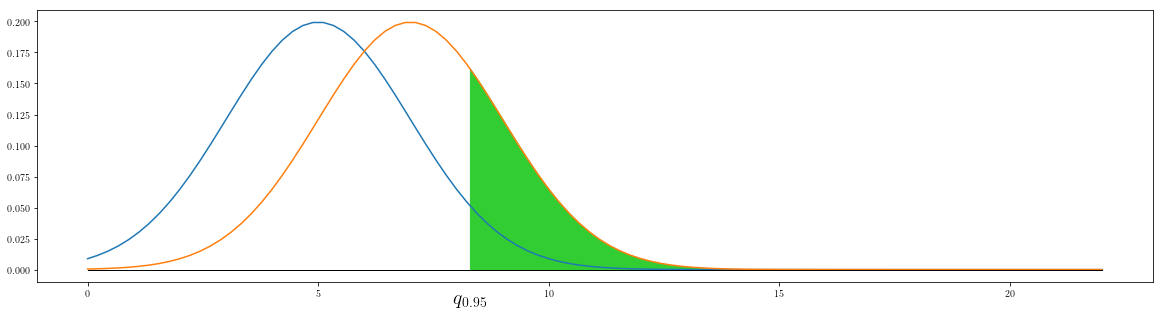

In [9]:
power(7)

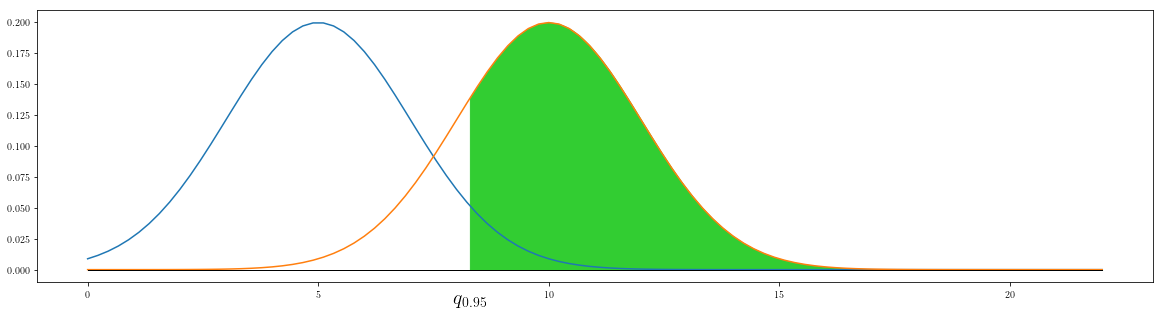

In [10]:
power(10)

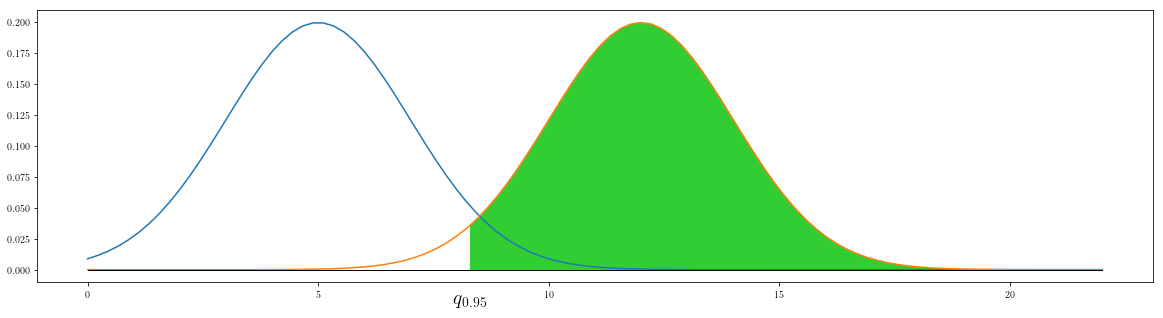

In [11]:
power(12)

Wer sehen also, je weiter die Alternativhypothese von der Alternativhypothese entfernt ist, umso grösser ist die Macht, das heisst die Wahrscheinlichkeit, die Nullhypothese richtigerweise verworfen zu haben. Und so sollte es ja auch so sein. 


## Macht und Signifikanzniveau

Wir wählen wieder $\mu_0=5$ und $\mu_A=10$. Diese lassen wir fest und untersuchen, welchen Einfluss das Signifikanzniveau auf die Macht und dementsprechend auf den Fehler 2. Art hat. 

Dazu definieren wir die Funktion power_alpha():

In [12]:
def power_alpha(alpha):
    plt.plot(x,y)
    conf = 1-alpha
    y_A = norm.pdf(x, loc=10, scale=2)
    plt.plot(x, y_A)
    q_alpha = norm.ppf(q=1-alpha, loc=5, scale=2)
    x_v = np.linspace(q_alpha, ew, 500)
    plt.fill_between(x_v, norm.pdf(x_v, loc=10, scale=2), color="limegreen")
    plt.text(q_alpha, -.03, r"$q_{1-\alpha}$", fontsize=20, ha="center")  
    plt.fill_between(x_v, norm.pdf(x_v, loc=5, scale=2), color="red")
    plt.plot([aw, ew], [0,0], color="black", linewidth=1)

Wir wählen $\alpha=0.1$, $\alpha=0.05$, $\alpha=0.01$

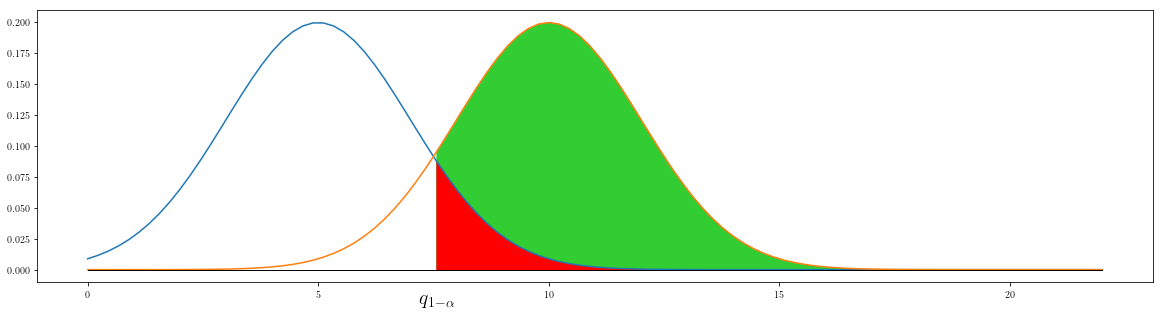

In [13]:
power_alpha(.1)

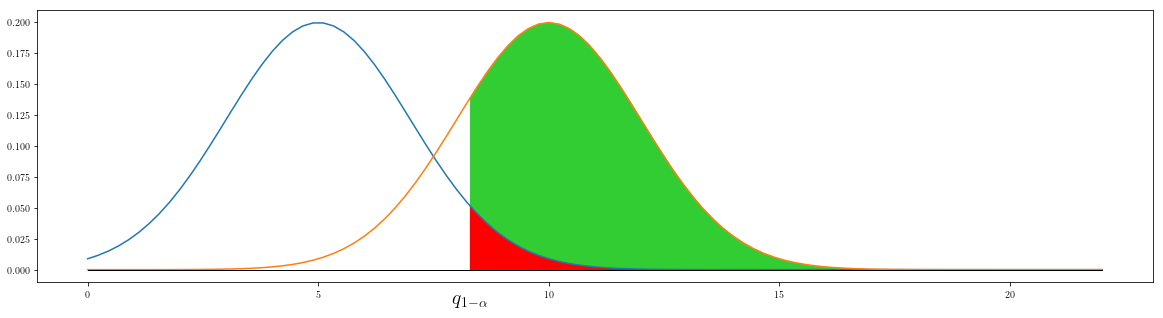

In [14]:
power_alpha(0.05)

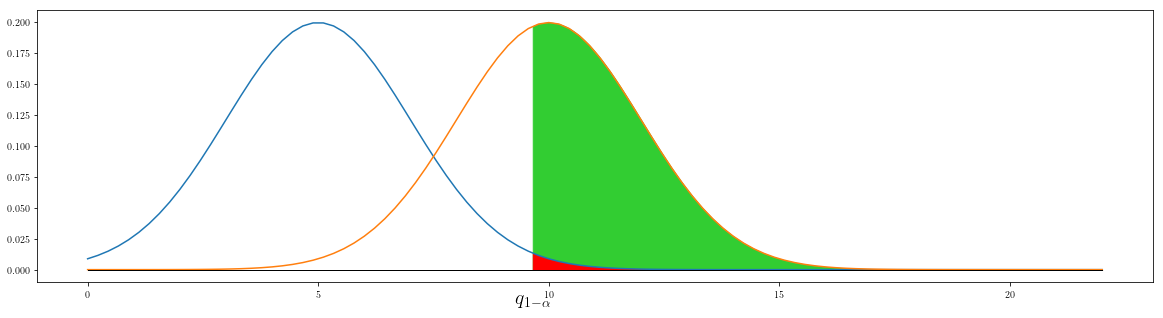

In [15]:
power_alpha(0.01)

Lassen wir $\alpha$ kleiner werden, so nimmt zwar der Fehler 1. Art ab, aber der Fehler 2. Art nimmt zu und damit nimmt die Macht (das was wir wollen) ab. 

Die Wahl von $\alpha$ ist immer eine Abwägung von kleinem Fehler 1. Art und grosser Macht.